In [8]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm_notebook

# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# H2b - Variational method with Metropolis

## Task 1

The energy is given as

$$ E_L = -4 + \frac{(\hat{r_1}-\hat{r_2}) \cdot (r_1 - r_2) }{r_{12}(1+\alpha r_{12})^2} - \frac{1}{r_{12}(1 + \alpha r_{12})^3} - \frac{1}{4(1+\alpha r_{12})^4} + \frac{1}{r_{12}},$$

where

$$ (\hat{r_1}-\hat{r_2}) \cdot (r_1 - r_2) = (\hat{x_1}-\hat{x_2}, \hat{y_1}-\hat{y_2}, \hat{z_1}-\hat{z_2})\cdot (x_1-x_2, y_1-y_2, z_1-z_2) = (\Delta \hat{x}, \Delta \hat{y}, \Delta \hat{z}) \cdot (\Delta x, \Delta y, \Delta z) = $$

$$ = \Delta x + \Delta y + \Delta z $$

$\Delta \hat{x}$ denotes a unit vector in the direction of $\Delta x$.

To find the density $\rho(r)$ we need to determine $r$. How do we do this for our system where we have two particles with different position vectors.

(10000, 2)


Text(0, 0.5, '$\\rho(r_2)$')

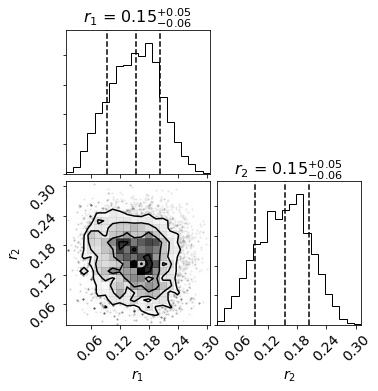

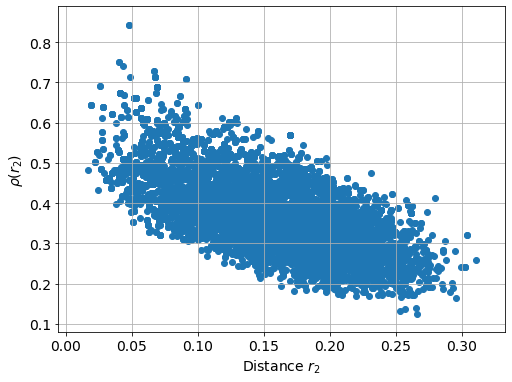

In [17]:
# Load rho data 
data = np.loadtxt('task1/rho.dat')

r_samples = np.vstack([data[:,0], data[:,1]]).T
print(r_samples.shape)

# Corner plot

figure = corner.corner(r_samples, labels=[r"$r_1$", r"$r_2$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16})

# plot 
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(data[:,1], data[:,2])
ax.grid()
ax.set_xlabel(r'Distance $r_2$')
ax.set_ylabel(r'$\rho(r_2)$')

Text(0.5, 0, '$x = \\cos{\\theta}}$')

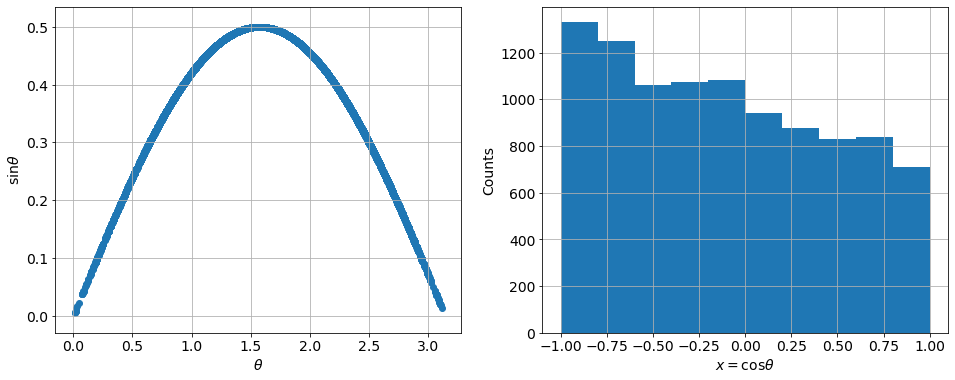

In [18]:
# Plot theta data

# Load rho data 
data = np.loadtxt('task1/theta.dat')

# plot 
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].scatter(data[:,0], data[:,1])
ax[0].grid()
ax[0].set_ylabel(r'$\sin{\theta}$')
ax[0].set_xlabel(r'$\theta$')

ax[1].hist(np.cos(data[:,0]))
ax[1].grid()
ax[1].set_ylabel(r'Counts')
ax[1].set_xlabel(r'$x = \cos{\theta}}$')

We see a higher sampled region for $\cos{\theta} \approx -1$ than for 1. This could be due to the walk starting out in this region, and thus taking more steps there. Since $p(\theta)$ should be uniform, the choice of starting points makes a difference now that we don't have any warm up steps.

Average energy is: -5633.629775322627 e.u.


Text(0.5, 0, '$\\theta$')

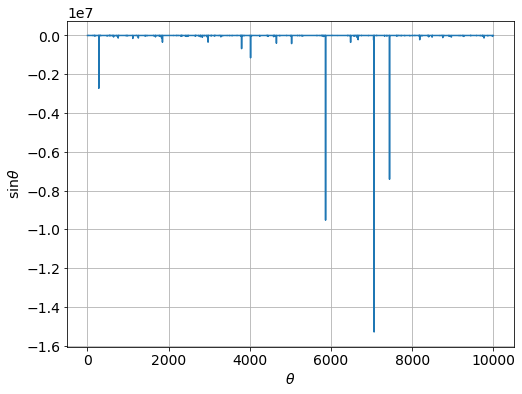

In [20]:
# Plot energy data

# Load rho data 
data = np.loadtxt('task1/energy.dat')

print(f'Average energy is: {np.mean(data)} e.u.')

# plot 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(data)
ax.grid()
ax.set_ylabel(r'$\sin{\theta}$')
ax.set_xlabel(r'$\theta$')